In [137]:
import pandas as pd

In [138]:
# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

In [139]:
df.columns

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers'],
      dtype='object')

Import excel with the themeparks and timezones

In [140]:
import pandas as pd

# Path to the Excel file
file_path = r"C:\Users\matth\Desktop\bda\Followers File_v2.xlsx"

# Read the Excel file into a pandas DataFrame
timeDf = pd.read_excel(file_path)

# Display the DataFrame
timeDf

,Profile,Followers,Timezone
0,Wild Adventures Theme Park,68,ET: 6 hours
1,Fun Spot America,100000,ET: 6 hours
2,Silverwood Theme Park,381000,PT: 9 hours
3,Belmont Park,51000,PT: 9 hours
4,SeaWorld Orlando,265000,ET: 6 hours
5,SeaWorld San Diego,127000,PT: 9 hours
6,Lake Compounce,166000,ET: 6 hours
7,Happy Hollow Park & Zoo,39000,PT: 9 hours
8,Universal Orlando Resort (US),3100000,ET: 6 hours
9,Busch Gardens Tampa Bay,692000,ET: 6 hours


In [141]:
# Split the 'Timezone' column and extract the number of hours
timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)

# Display the updated dataframe
timeDf

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\matth\AppData\Local\Temp\ipykernel_8632\2307643195.py:2: SyntaxWarning: invalid escape sequence '\d'
  timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)


,Profile,Followers,Timezone,Difference
0,Wild Adventures Theme Park,68,ET: 6 hours,6
1,Fun Spot America,100000,ET: 6 hours,6
2,Silverwood Theme Park,381000,PT: 9 hours,9
3,Belmont Park,51000,PT: 9 hours,9
4,SeaWorld Orlando,265000,ET: 6 hours,6
5,SeaWorld San Diego,127000,PT: 9 hours,9
6,Lake Compounce,166000,ET: 6 hours,6
7,Happy Hollow Park & Zoo,39000,PT: 9 hours,9
8,Universal Orlando Resort (US),3100000,ET: 6 hours,6
9,Busch Gardens Tampa Bay,692000,ET: 6 hours,6


In [142]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Profile': 'profile'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile  Followers     Timezone  Difference
0  Wild Adventures Theme Park         68  ET: 6 hours           6
1            Fun Spot America     100000  ET: 6 hours           6
2       Silverwood Theme Park     381000  PT: 9 hours           9
3                Belmont Park      51000  PT: 9 hours           9
4            SeaWorld Orlando     265000  ET: 6 hours           6


In [143]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Date': 'date'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile  Followers     Timezone  Difference
0  Wild Adventures Theme Park         68  ET: 6 hours           6
1            Fun Spot America     100000  ET: 6 hours           6
2       Silverwood Theme Park     381000  PT: 9 hours           9
3                Belmont Park      51000  PT: 9 hours           9
4            SeaWorld Orlando     265000  ET: 6 hours           6


In [144]:
# Merge dataframes on 'profile'
merged_df = pd.merge(df, timeDf, on='profile', how='left')


merged_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,Followers,Timezone,Difference
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66.0,NaN,NaN,NaN
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000.0,NaN,NaN,NaN
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000.0,NaN,NaN,NaN
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,NaN,NaN,NaN,NaN
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66.0,NaN,NaN,NaN
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000.0,NaN,NaN,NaN
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,NaN,NaN,NaN,NaN
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\r\...,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000.0,NaN,NaN,NaN


In [145]:
# Convert the 'Date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Adjust the time based on the 'Difference' column
merged_df['date'] -= pd.to_timedelta(merged_df['Difference'].fillna(0), unit='h')

# Display the updated dataframe
merged_df

C:\Users\matth\AppData\Local\Temp\ipykernel_8632\4030113111.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,Followers,Timezone,Difference
0,2023-12-31 21:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66.0,NaN,NaN,NaN
1,2023-12-31 20:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000.0,NaN,NaN,NaN
2,2023-12-31 19:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000.0,NaN,NaN,NaN
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,NaN,NaN,NaN,NaN
4,2023-12-31 19:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,wild adventures theme park,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66.0,NaN,NaN,NaN
15439,2023-01-01 01:20:00,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000.0,NaN,NaN,NaN
15440,2023-01-01 00:01:00,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,NaN,NaN,NaN,NaN
15441,2023-01-01 00:00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\r\...,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000.0,NaN,NaN,NaN


In [146]:
# Extract the 'Date' column
date_column = merged_df['date']

# Display the 'Date' column
print(date_column)

0       2023-12-31 21:40:00
1       2023-12-31 20:01:00
2       2023-12-31 19:30:00
3       2023-12-31 19:00:00
4       2023-12-31 19:00:00
                ...        
15438   2023-01-01 02:00:00
15439   2023-01-01 01:20:00
15440   2023-01-01 00:01:00
15441   2023-01-01 00:00:00
15442   2023-01-01 00:00:00
Name: date, Length: 15443, dtype: datetime64[ns]


Split up the time of day in morning, afternoon and evening

In [147]:
# Categorize dates into days of the week (Monday to Sunday)
merged_df['Day of Week'] = merged_df['date'].dt.strftime('%A')

# Categorize times into morning, afternoon, and evening
def categorize_time(time):
    if time.hour < 12:
        return 'Morning'
    elif time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply categorization to create a new column 'Time of Day'
merged_df['Time of Day'] = merged_df['date'].apply(categorize_time)

# Display the result
print(merged_df[['date', 'Day of Week', 'Time of Day']])


                     date Day of Week Time of Day
0     2023-12-31 21:40:00      Sunday     Evening
1     2023-12-31 20:01:00      Sunday     Evening
2     2023-12-31 19:30:00      Sunday     Evening
3     2023-12-31 19:00:00      Sunday     Evening
4     2023-12-31 19:00:00      Sunday     Evening
...                   ...         ...         ...
15438 2023-01-01 02:00:00      Sunday     Morning
15439 2023-01-01 01:20:00      Sunday     Morning
15440 2023-01-01 00:01:00      Sunday     Morning
15441 2023-01-01 00:00:00      Sunday     Morning
15442 2023-01-01 00:00:00      Sunday     Morning

[15443 rows x 3 columns]


In [148]:
# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Print the count of unique values
print("Count of unique values in the 'Time of Day' column:")
print(time_of_day_counts)


Count of unique values in the 'Time of Day' column:
Time of Day
Evening      8412
Afternoon    4127
Morning      2904
Name: count, dtype: int64


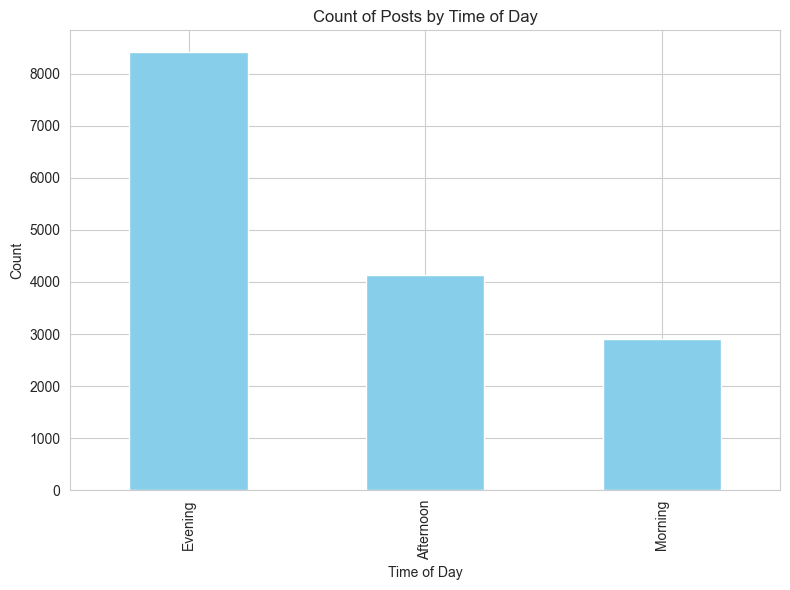

In [149]:
import matplotlib.pyplot as plt

# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
time_of_day_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Count of Posts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


Calculate the engagement

In [150]:
# Calculate Total Interactions (Engagement)
#df['Engagement'] = df['Number of Reactions'].fillna(0) + df['Number of Shares'].fillna(0) + df['Number of Comments (primary)'].fillna(0)

# Displaying the calculated engagement metric along with other relevant columns
print(merged_df[['date', 'profile', 'Time of Day', 'engagement']])

                     date                                    profile  \
0     2023-12-31 21:40:00                 wild adventures theme park   
1     2023-12-31 20:01:00                           fun spot america   
2     2023-12-31 19:30:00                           fun spot america   
3     2023-12-31 19:00:00                           disneyland paris   
4     2023-12-31 19:00:00                      silverwood theme park   
...                   ...                                        ...   
15438 2023-01-01 02:00:00                 wild adventures theme park   
15439 2023-01-01 01:20:00                                   playland   
15440 2023-01-01 00:01:00                           disneyland paris   
15441 2023-01-01 00:00:00  six flags over georgia & hurricane harbor   
15442 2023-01-01 00:00:00                         knott's berry farm   

      Time of Day    engagement  
0         Evening  1.090000e+12  
1         Evening  4.170000e+11  
2         Evening  2.850000e+11  

In [151]:
# Convert the column to string type
merged_df['engagement'] = merged_df['engagement'].astype(str)

# Replace comma with dot and convert to float
merged_df['engagement'] = merged_df['engagement'].str.replace(',', '.').astype(float)


import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test
result = f_oneway(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

# Interpret the results
alpha = 0.05  # significance level
if result.pvalue < alpha:
    print("The p-value is less than", alpha, "so we reject the null hypothesis.")
    print("There is evidence to suggest that post time significantly affects user engagement in Facebook posts.")
else:
    print("The p-value is greater than or equal to", alpha, "so we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that post time affects user engagement in Facebook posts.")


In [152]:
# Print column names in the DataFrame
print(merged_df.columns)


Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'Followers', 'Timezone', 'Difference',
       'Day of Week', 'Time of Day'],
      dtype='object')


In [153]:
# Extract unique weekdays
unique_weekdays = merged_df['Day of Week'].unique()

# Display the unique weekdays
print("Unique Weekdays:")
for weekday in unique_weekdays:
    print(weekday)

Unique Weekdays:
Sunday
Saturday
Friday
Thursday
Wednesday
Tuesday
Monday


In [154]:
# Extract unique times of the day
unique_times_of_day = merged_df['Time of Day'].unique()

# Display the unique times of the day
print("Unique Times of Day:")
for time_of_day in unique_times_of_day:
    print(time_of_day)

Unique Times of Day:
Evening
Afternoon
Morning


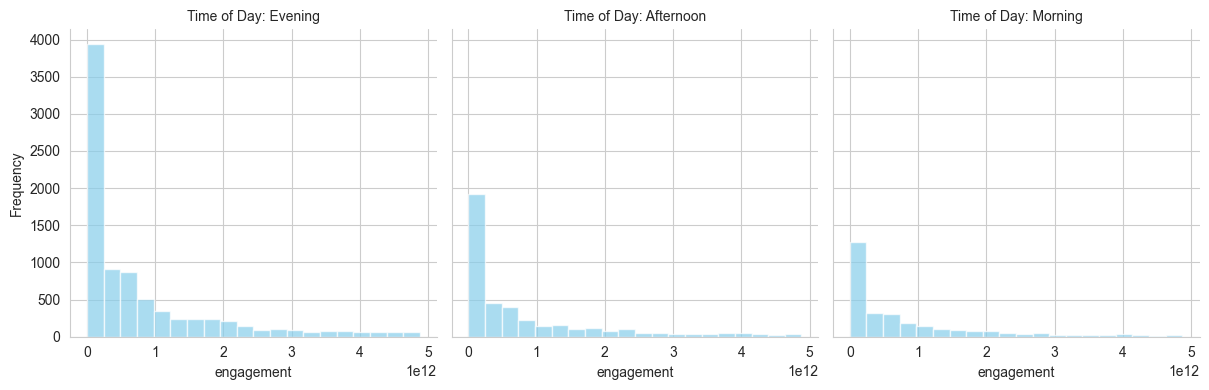

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create a facet grid of histograms
g = sns.FacetGrid(merged_df, col='Time of Day', col_wrap=3, height=4)
g.map(plt.hist, 'engagement', bins=20, color='skyblue', alpha=0.7)

# Set labels and titles
g.set_axis_labels("engagement", "Frequency")
g.set_titles("Time of Day: {col_name}")

# Show the plot
plt.show()


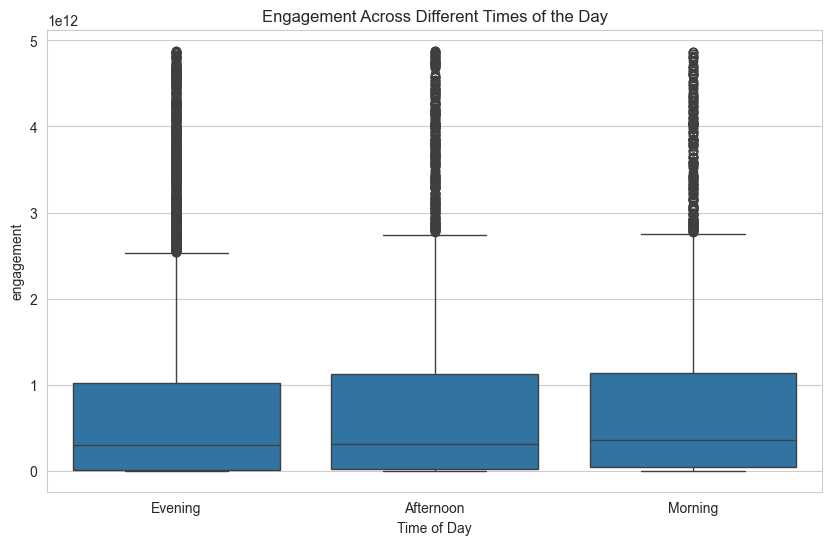

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time of Day', y='engagement', data=merged_df)
plt.title('Engagement Across Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('engagement')
plt.show()

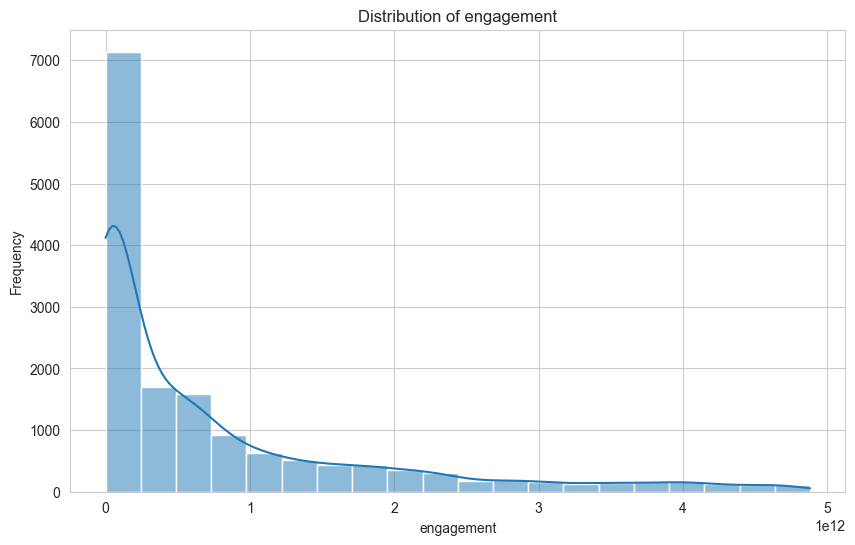

In [158]:
# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['engagement'], bins=20, kde=True)
plt.title('Distribution of engagement')
plt.xlabel('engagement')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk test to see if the data is normally distributed

In [159]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
statistic, p_value = shapiro(merged_df['engagement'])

# Display the test result
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")


Shapiro-Wilk Test Results:
Test Statistic: 0.7344926595687866
p-value: 0.0
The data does not follow a normal distribution (reject the null hypothesis).


c:\Users\matth\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


levene test to look at the homogeneity of varianc

In [160]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
statistic, p_value = levene(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display the test result
print("Levene's Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The variances are approximately equal across groups (fail to reject the null hypothesis).")
else:
    print("The variances are significantly different across groups (reject the null hypothesis).")


Levene's Test Results:
Test Statistic: 2.530363623271553
p-value: 0.07966308072019027
The variances are approximately equal across groups (fail to reject the null hypothesis).


Anova test to check

In [161]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform ANOVA test
result_anova = f_oneway(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)

# Perform post hoc analysis (Tukey's HSD)
if result_anova.pvalue < 0.05:  # Check if ANOVA result is significant
    posthoc = pairwise_tukeyhsd(merged_df['engagement'], merged_df['Time of Day'], alpha=0.05)
    print("\nPost Hoc Analysis (Tukey's HSD):")
    print(posthoc)

    # Interpretation
    morning_vs_afternoon = posthoc.reject[0]  # Compare morning vs afternoon
    if morning_vs_afternoon:
        print("\nThere is a significant difference between morning and afternoon posts.")
    else:
        print("\nThere is no significant difference between morning and afternoon posts.")
else:
    print("\nNo significant difference among time periods.")


ANOVA Test Results:
F-statistic: 3.253911346266927
p-value: 0.03864933184048914

Post Hoc Analysis (Tukey's HSD):
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
  group1   group2      meandiff     p-adj        lower            upper       reject
------------------------------------------------------------------------------------
Afternoon Evening -43912812942.1626 0.0858 -92458264002.4872   4632638118.162  False
Afternoon Morning    2377163455.635 0.9955 -59492387572.1784 64246714483.4484  False
  Evening Morning  46289976397.7976 0.1188  -8687207139.8298 101267159935.425  False
------------------------------------------------------------------------------------

There is no significant difference between morning and afternoon posts.


Welch Anova test

In [162]:
import pingouin as pg

# Perform Welch's ANOVA test
result_welch_anova = pg.welch_anova(
    data=merged_df,
    dv='engagement',
    between='Time of Day'
)

# Display Welch's ANOVA test results
print("Welch's ANOVA Test Results:")
print(result_welch_anova)


Welch's ANOVA Test Results:
        Source  ddof1        ddof2         F     p-unc       np2
0  Time of Day      2  6913.670663  3.243358  0.039092  0.000421


Kruskal-Wallis test to answer H1a

In [163]:
from scipy.stats import kruskal

# Define the engagement data for each time period
engagement_morning = merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna()
engagement_afternoon = merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna()
engagement_evening = merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()

# Perform Kruskal-Wallis test
result_kruskal = kruskal(engagement_morning, engagement_afternoon, engagement_evening)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Interpret the results
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print("There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).")
else:
    print("There is no significant difference in user engagement levels among posts made during different time periods (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 13.045974487026838
p-value: 0.0014692734625790177
There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).


In [164]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Perform pairwise comparisons using Mann-Whitney U test with Bonferroni correction
alpha = 0.05
n_groups = len(time_periods)
pairwise_comparisons = list(combinations(time_periods, 2))
for group1, group2 in pairwise_comparisons:
    group1_data = merged_df[merged_df['Time of Day'] == group1]['engagement'].dropna()
    group2_data = merged_df[merged_df['Time of Day'] == group2]['engagement'].dropna()
    
    # Perform Mann-Whitney U test
    result_mannwhitney = mannwhitneyu(group1_data, group2_data)
    
    # Apply Bonferroni correction to the significance level
    adjusted_alpha = alpha / len(pairwise_comparisons)
    
    # Display pairwise comparison results
    print(f"\nPairwise Comparison: {group1} vs {group2}")
    print("U-statistic:", result_mannwhitney.statistic)
    print("p-value:", result_mannwhitney.pvalue)
    if result_mannwhitney.pvalue < adjusted_alpha:
        print("The difference is statistically significant (reject the null hypothesis).")
    else:
        print("There is no statistically significant difference (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 13.045974487026838
p-value: 0.0014692734625790177

Pairwise Comparison: Morning vs Afternoon
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Pairwise Comparison: Morning vs Evening
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).

Pairwise Comparison: Afternoon vs Evening
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).


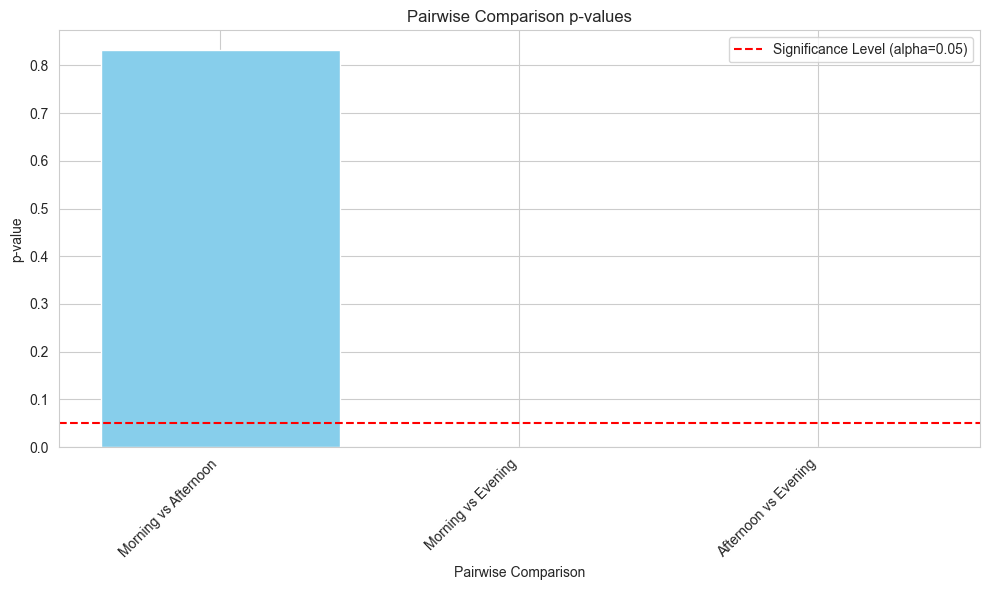

In [165]:
# Data for the pairwise comparisons
pairwise_comparison = {
    'Morning vs Afternoon': {'U-statistic': 23058633.0, 'p-value': 0.8318153634029462},
    'Morning vs Evening': {'U-statistic': 6227116.5, 'p-value': 8.285495186559066e-06},
    'Afternoon vs Evening': {'U-statistic': 5483562.0, 'p-value': 5.285133784850102e-06}
}

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for pairwise comparisons
bars = plt.bar(pairwise_comparison.keys(), [pairwise_comparison[key]['p-value'] for key in pairwise_comparison.keys()], color='skyblue')

# Add error bars
for bar, key in zip(bars, pairwise_comparison.keys()):
    plt.errorbar(bar.get_x() + bar.get_width()/2, pairwise_comparison[key]['p-value'], xerr=None, yerr=None, fmt='none', ecolor='black', capsize=5)

# Add labels and title
plt.title('Pairwise Comparison p-values')
plt.xlabel('Pairwise Comparison')
plt.ylabel('p-value')

# Add horizontal line at significance level (e.g., alpha = 0.05)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (alpha=0.05)')

# Add legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

Mann-Whitney U test to answer H1b

In [166]:
from scipy.stats import mannwhitneyu

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).



In [167]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Define a function to calculate the Common Language Effect Size
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()
        
        # Calculate the Common Language Effect Size
        cles = cles_ind(data_1, data_2)
        print("Common Language Effect Size:", cles)
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.511417788253262

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).

Common Language Effect Size: 0.5215645709461363

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.5098734243867524

